In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py, glob
import pandas as pd

from scipy.stats import ks_2samp
from ang_res_funcs import *
def getMedian(data):
    dat = data[0]*(10**-6)
    wei = data[1]
    median = weighted_quantile(dat, .5, sample_weight=wei/sum(wei))
    percentile_16 = weighted_quantile(dat, .5-.34, sample_weight=wei/sum(wei))
    percentile_84 = weighted_quantile(dat, .5+.34, sample_weight=wei/sum(wei))
    return [median, percentile_16, percentile_84]

In [2]:
PARENT_DIRECTORY = '/data/ana/CosmicRay/Anisotropy/IceTop/twelve_year/03_sim_study'
years = [2012, 2015, 2018]
DIRECTS = [f'{PARENT_DIRECTORY}/IT81-{year}' for year in years]
for year, DIRECT in zip(years, DIRECTS):
    mc_en_p_t3 = np.load(DIRECT +'/Proton-T3-MC-Energy.npy')
    mc_en_he_t3 = np.load(DIRECT +'/Helium-T3-MC-Energy.npy')
    mc_en_o_t3 = np.load(DIRECT +'/Oxygen-T3-MC-Energy.npy')
    mc_en_fe_t3 = np.load(DIRECT +'/Iron-T3-MC-Energy.npy')
        
    mc_en_p_t4 = np.load(DIRECT +'/Proton-T4-MC-Energy.npy')
    mc_en_he_t4 = np.load(DIRECT +'/Helium-T4-MC-Energy.npy')
    mc_en_o_t4 = np.load(DIRECT +'/Oxygen-T4-MC-Energy.npy')
    mc_en_fe_t4 = np.load(DIRECT +'/Iron-T4-MC-Energy.npy')
        
    mc_w_p_t3 = np.load(DIRECT +'/Proton-T3-MC-Weights.npy')
    mc_w_he_t3 = np.load(DIRECT +'/Helium-T3-MC-Weights.npy')
    mc_w_o_t3 = np.load(DIRECT +'/Oxygen-T3-MC-Weights.npy')
    mc_w_fe_t3 = np.load(DIRECT +'/Iron-T3-MC-Weights.npy')
        
    mc_w_p_t4 = np.load(DIRECT +'/Proton-T4-MC-Weights.npy')
    mc_w_he_t4 = np.load(DIRECT +'/Helium-T4-MC-Weights.npy')
    mc_w_o_t4 = np.load(DIRECT +'/Oxygen-T4-MC-Weights.npy')
    mc_w_fe_t4 = np.load(DIRECT +'/Iron-T4-MC-Weights.npy')
        
    mc_en_t3 = np.concatenate((mc_en_p_t3, mc_en_he_t3, mc_en_o_t3, mc_en_fe_t3), axis=None)
    mc_en_t4 = np.concatenate((mc_en_p_t4, mc_en_he_t4, mc_en_o_t4, mc_en_fe_t4), axis=None)

    mc_w_t3 = np.concatenate((mc_w_p_t3, mc_w_he_t3, mc_w_o_t3, mc_w_fe_t3), axis=None)
    mc_w_t4 = np.concatenate((mc_w_p_t4, mc_w_he_t4, mc_w_o_t4, mc_w_fe_t4), axis=None)

    np.save(f'/data/user/ahayes/mc_en_t3_{year}.npy', mc_en_t3)
    np.save(f'/data/user/ahayes/mc_en_t4_{year}.npy', mc_en_t4)
    np.save(f'/data/user/ahayes/mc_w_t3_{year}.npy', mc_w_t3)
    np.save(f'/data/user/ahayes/mc_w_t4_{year}.npy', mc_w_t4)

In [3]:
mc_en_t3_2012 = np.load(f'/data/user/ahayes/mc_en_t3_2012.npy')
mc_en_t4_2012 = np.load(f'/data/user/ahayes/mc_en_t4_2012.npy')
mc_en_t3_2015 = np.load(f'/data/user/ahayes/mc_en_t3_2015.npy')
mc_en_t4_2015 = np.load(f'/data/user/ahayes/mc_en_t4_2015.npy')
mc_en_t3_2018 = np.load(f'/data/user/ahayes/mc_en_t3_2018.npy')
mc_en_t4_2018 = np.load(f'/data/user/ahayes/mc_en_t4_2018.npy')
mc_w_t3_2012 = np.load(f'/data/user/ahayes/mc_w_t3_2012.npy')
mc_w_t4_2012 = np.load(f'/data/user/ahayes/mc_w_t4_2012.npy')
mc_w_t3_2015 = np.load(f'/data/user/ahayes/mc_w_t3_2015.npy')
mc_w_t4_2015 = np.load(f'/data/user/ahayes/mc_w_t4_2015.npy')
mc_w_t3_2018 = np.load(f'/data/user/ahayes/mc_w_t3_2018.npy')
mc_w_t4_2018 = np.load(f'/data/user/ahayes/mc_w_t4_2018.npy')
print("Done loading")

mc_en_all = [mc_en_t3_2012, mc_en_t4_2012, mc_en_t3_2015, mc_en_t4_2015, mc_en_t3_2018, mc_en_t4_2018]
mc_w_all = [mc_w_t3_2012, mc_w_t4_2012, mc_w_t3_2015, mc_w_t4_2015, mc_w_t3_2018, mc_w_t4_2018]
median_list_t3 = []
percentile_16_t3 = []
percentile_84_t3 = []
median_list_t4 = []
percentile_16_t4 = []
percentile_84_t4 = []

for arra in [[mc_en_t3_2012, mc_w_t3_2012], [mc_en_t3_2015, mc_w_t3_2015], [mc_en_t3_2018, mc_w_t3_2018]]:
    median, percentile_16, percentile_84 = getMedian(arra)
    median_list_t3.append(median)
    percentile_16_t3.append(percentile_16)
    percentile_84_t3.append(percentile_84)

for arra in [[mc_en_t4_2012, mc_w_t4_2012], [mc_en_t4_2015, mc_w_t4_2015], [mc_en_t4_2018, mc_w_t4_2018]]:
    median, percentile_16, percentile_84 = getMedian(arra)
    median_list_t4.append(median)
    percentile_16_t4.append(percentile_16)
    percentile_84_t4.append(percentile_84)

print(median_list_t3)
print(percentile_16_t3)
print(median_list_t4)
print(percentile_16_t4)

Done loading
[2.3610938121423373, 2.76939725, 2.19339375]
[1.287734875, 1.500362375, 1.111009625]
[6.887783499999999, 8.683085521894332, 8.0169535]
[3.9180615, 4.905365, 4.529697]


In [4]:
data = {
    'year': [2012, 2012, 2015, 2015, 2018, 2018],
    'tier': [3, 4, 3, 4, 3, 4],
    'median_energy': [median_list_t3[0], median_list_t4[0], median_list_t3[1], median_list_t4[1], median_list_t3[2], median_list_t4[2]],
    'percentile_16': [percentile_16_t3[0], percentile_16_t4[0], percentile_16_t3[1], percentile_16_t4[1], percentile_16_t3[2], percentile_16_t4[2]],
    'percentile_84': [percentile_84_t3[0], percentile_84_t4[0], percentile_84_t3[1], percentile_84_t4[1], percentile_84_t3[2], percentile_84_t4[2]]
}

df = pd.DataFrame(data)

df['lower_error'] = df['median_energy'] - df['percentile_16']
df['upper_error'] = df['percentile_84'] - df['median_energy']

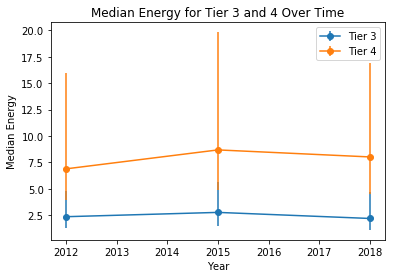

In [6]:
fig, ax = plt.subplots()

# Plot median energy with asymmetric error bars
for tier in df['tier'].unique():
    tier_data = df[df['tier'] == tier]
    ax.errorbar(tier_data['year'], tier_data['median_energy'], 
                yerr=[tier_data['lower_error'], tier_data['upper_error']], 
                fmt='o-', label=f'Tier {tier}')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Median Energy')
ax.set_title('Median Energy for Tier 3 and 4 Over Time')
ax.legend()

# Show the plot
plt.show()